## Normalizacja

In [3]:
data = read.csv("day.csv")
keeps <- c("temp",  "hum", "windspeed", "cnt")
df = data[keeps]
head(df)

temp,hum,windspeed,cnt
0.344167,0.805833,0.1604460,985
0.363478,0.696087,0.2485390,801
0.196364,0.437273,0.2483090,1349
0.200000,0.590435,0.1602960,1562
0.226957,0.436957,0.1869000,1600
0.204348,0.518261,0.0895652,1606


In [79]:
x <- df
normalized = (x-min(x))/(max(x)-min(x))
head(normalized)
range(normalized)

temp,hum,windspeed,cnt
3.949587e-05,9.247567e-05,1.841244e-05,0.11303649
4.171196e-05,7.988146e-05,2.852180e-05,0.09192105
2.253431e-05,5.018051e-05,2.849541e-05,0.15480835
2.295157e-05,6.775706e-05,1.839523e-05,0.17925178
2.604510e-05,5.014425e-05,2.144824e-05,0.18361258
2.345054e-05,5.947452e-05,1.027831e-05,0.18430112


[1] 0 1

In [76]:
cor(normalized)

,temp,hum,windspeed,cnt
temp,1.0000000,0.1269629,-0.1579441,0.6274940
hum,0.1269629,1.0000000,-0.2484891,-0.1006586
windspeed,-0.1579441,-0.2484891,1.0000000,-0.2345450
cnt,0.6274940,-0.1006586,-0.2345450,1.0000000



Call:
lm(formula = normalized$cnt ~ normalized$temp + normalized$hum + 
    normalized$windspeed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54860 -0.12423 -0.00714  0.12124  0.41926 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.687e-01  3.877e-02  12.089  < 2e-16 ***
normalized$temp       6.626e+03  2.931e+02  22.606  < 2e-16 ***
normalized$hum       -3.100e+03  3.840e+02  -8.073 2.83e-15 ***
normalized$windspeed -4.807e+03  7.089e+02  -6.781 2.48e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1636 on 727 degrees of freedom
Multiple R-squared:  0.4609,	Adjusted R-squared:  0.4587 
F-statistic: 207.2 on 3 and 727 DF,  p-value: < 2.2e-16


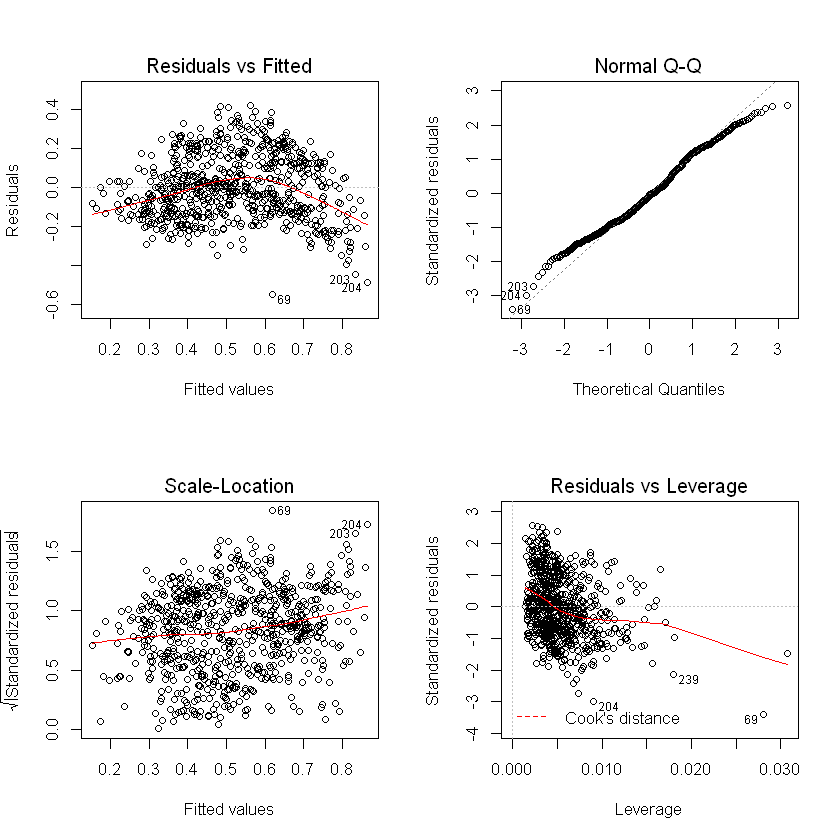

In [77]:
model <- lm(normalized$cnt~normalized$temp + normalized$hum + normalized$windspeed)
summary(model)
par(mfrow=c(2, 2))
plot(model)

** W sumie po normalizacji bez zmian **

## Dodaje kolumnę z procentowym udziałem zarejestrowanych userów w całości cnt wypozyczonych rowerow

In [47]:
data_p <- data.frame(df, 'percent' = (data$registered / data$cnt))
head(data_p)

temp,hum,windspeed,cnt,percent
0.344167,0.805833,0.1604460,985,0.6639594
0.363478,0.696087,0.2485390,801,0.8364544
0.196364,0.437273,0.2483090,1349,0.9110452
0.200000,0.590435,0.1602960,1562,0.9308579
0.226957,0.436957,0.1869000,1600,0.9487500
0.204348,0.518261,0.0895652,1606,0.9452055



Call:
lm(formula = data_p$cnt ~ data_p$temp + data_p$hum + data_p$windspeed + 
    data_p$percent)

Residuals:
    Min      1Q  Median      3Q     Max 
-4760.7 -1085.2   -75.4  1064.9  3635.3 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4224.7      576.0   7.334 5.98e-13 ***
data_p$temp        6588.9      317.6  20.748  < 2e-16 ***
data_p$hum        -3087.0      386.7  -7.983 5.59e-15 ***
data_p$windspeed  -4793.6      710.7  -6.745 3.13e-11 ***
data_p$percent     -161.3      536.0  -0.301    0.764    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1426 on 726 degrees of freedom
Multiple R-squared:  0.461,	Adjusted R-squared:  0.458 
F-statistic: 155.2 on 4 and 726 DF,  p-value: < 2.2e-16


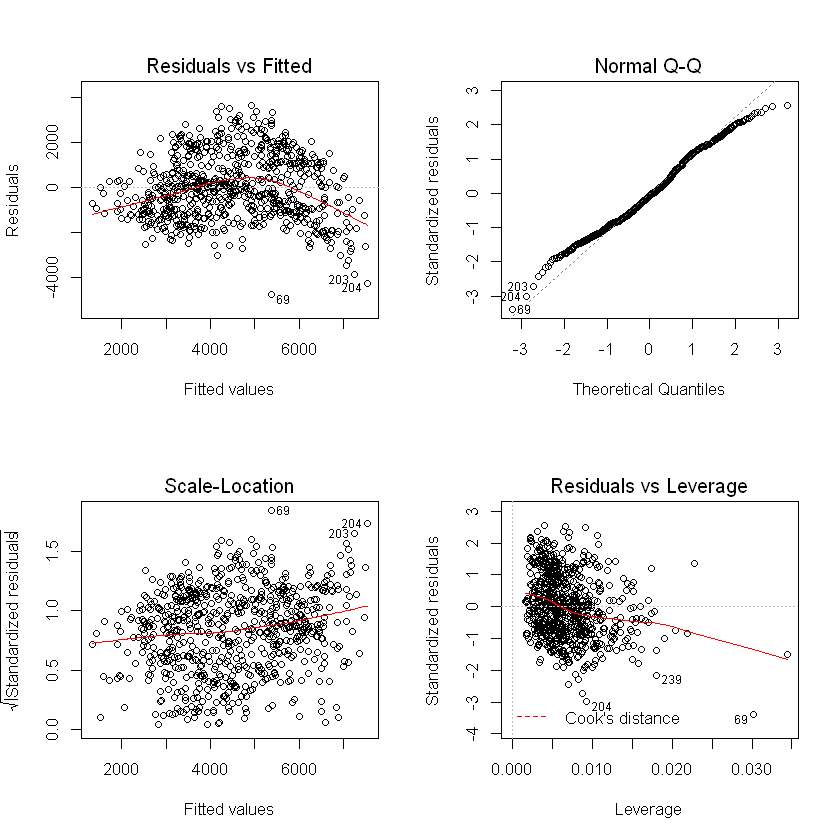

In [80]:
model2 <- lm(data_p$cnt~data_p$temp + data_p$hum + data_p$windspeed + data_p$percent)
summary(model2)
par(mfrow=c(2, 2))
plot(model2)

Praktycznie bez zmian

## Wartości odstające

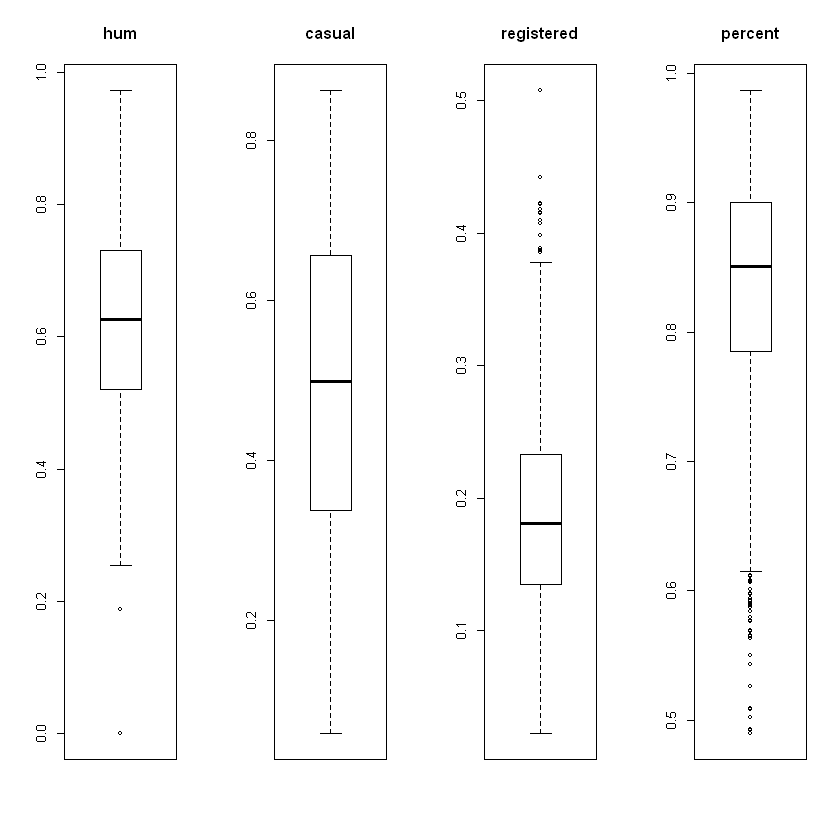

In [99]:
par(mfrow=c(1, 4))

boxplot(data_p$hum, main="hum")
boxplot(data_p$temp, main="casual")
boxplot(data_p$windspeed, main="registered")
boxplot(data_p$percent, main="percent")

In [102]:
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 1.5 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}

withoutOutliers <- data.frame(
    'hum' = remove_outliers(data_p$hum),
    'temp' = remove_outliers(data_p$temp),
    'windspeed' = remove_outliers(data_p$windspeed),
    'percent' = remove_outliers(data_p$percent),
    'cnt' = data_p$cnt)
head(withoutOutliers)

hum,temp,windspeed,percent,cnt
0.805833,0.344167,0.1604460,0.6639594,985
0.696087,0.363478,0.2485390,0.8364544,801
0.437273,0.196364,0.2483090,0.9110452,1349
0.590435,0.200000,0.1602960,0.9308579,1562
0.436957,0.226957,0.1869000,0.9487500,1600
0.518261,0.204348,0.0895652,0.9452055,1606


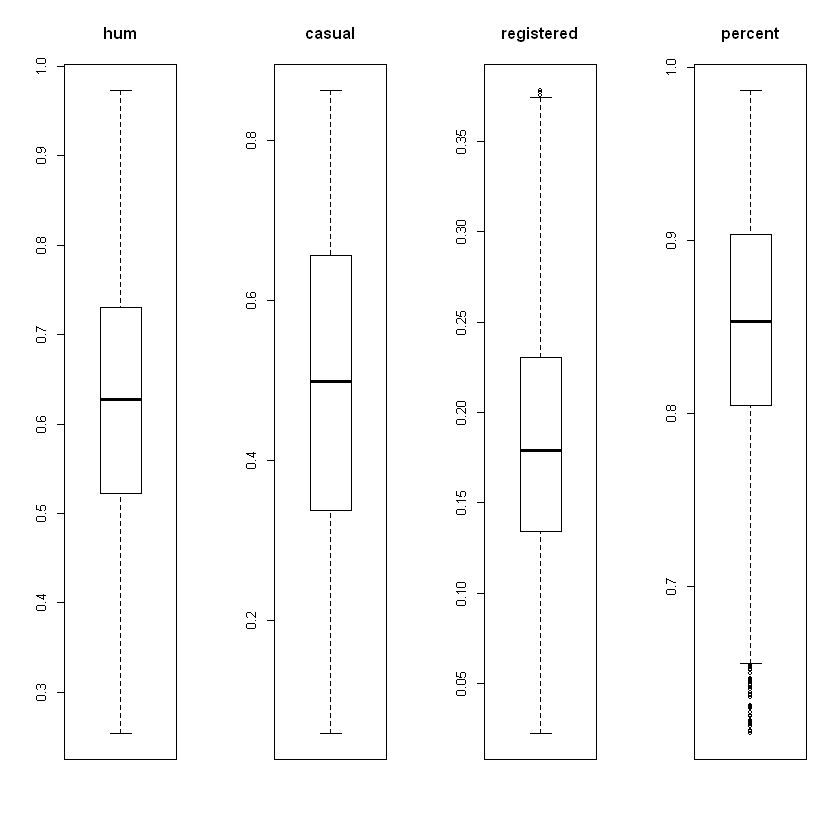

In [103]:
par(mfrow=c(1, 4))

boxplot(withoutOutliers$hum, main="hum")
boxplot(withoutOutliers$temp, main="casual")
boxplot(withoutOutliers$windspeed, main="registered")
boxplot(withoutOutliers$percent, main="percent")


Call:
lm(formula = withoutOutliers$cnt ~ withoutOutliers$temp + withoutOutliers$hum + 
    withoutOutliers$windspeed + withoutOutliers$percent)

Residuals:
    Min      1Q  Median      3Q     Max 
-4312.7 -1103.8   -91.1  1096.9  3512.0 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5072.6      686.9   7.384 4.52e-13 ***
withoutOutliers$temp        6355.6      332.6  19.110  < 2e-16 ***
withoutOutliers$hum        -3371.5      405.3  -8.318 4.93e-16 ***
withoutOutliers$windspeed  -4800.3      783.8  -6.125 1.54e-09 ***
withoutOutliers$percent     -795.1      660.4  -1.204    0.229    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1423 on 676 degrees of freedom
  (50 observations deleted due to missingness)
Multiple R-squared:  0.4643,	Adjusted R-squared:  0.4612 
F-statistic: 146.5 on 4 and 676 DF,  p-value: < 2.2e-16


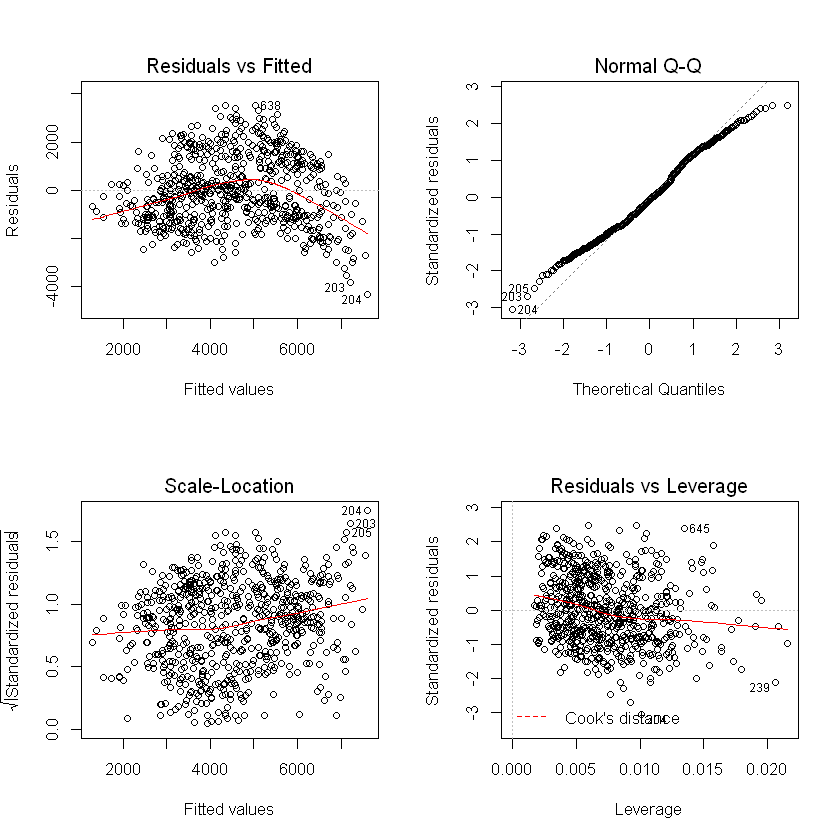

In [104]:
model3 <- lm(withoutOutliers$cnt~withoutOutliers$temp + withoutOutliers$hum + withoutOutliers$windspeed + withoutOutliers$percent)
summary(model3)
par(mfrow=c(2, 2))
plot(model3)